# K means clustering implemention from the scratch

Algorithm
Our algorithm works as follows, assuming we have inputs $x_1, x_2, x_3, ..., x_n$ and value of K.

* Step 1 - Pick K random points as cluster centers called centroids.
* Step 2 - Assign each $x_i$ to nearest cluster by calculating its distance to each centroid.
* Step 3 - Find new cluster center by taking the average of the assigned points.
* Step 4 - Repeat Step 2 and 3 until none of the cluster assignments change.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

In [2]:
# Importing the dataset
data = pd.read_csv('xclara.csv')
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


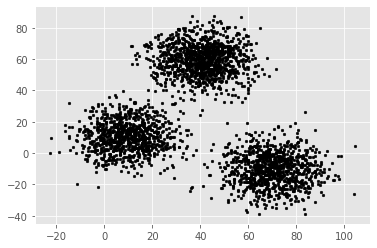

In [3]:
# Getting the values and plotting it
f1 = data['V1'].values
f2 = data['V2'].values
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)

In [4]:
# Euclidean Distance Caculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

## Step 1: Pick K random points as cluster centers called centroids

In [5]:
# Number of clusters
k = 3
# X coordinates of random centroids
C_x = np.random.randint(0, np.max(X)-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, np.max(X)-20, size=k)
C = np.array(list(zip(C_x, C_y)), dtype=np.float32)
print("Initial Centroids")
print(C)

Initial Centroids
[[ 8. 34.]
 [38. 64.]
 [ 8. 11.]]


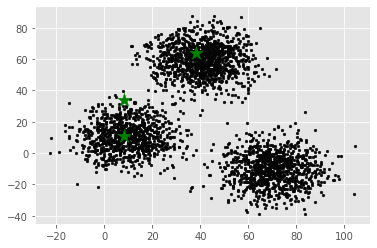

In [6]:
# Plotting along with the Centroids
plt.scatter(f1, f2, c='#050505', s=7)
plt.scatter(C_x, C_y, marker='*', s=200, c='g')

## Step 2 + Step 3

In [7]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster Lables(0, 1, 2)
clusters = np.zeros(len(X))

# Error func. - Distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run till the error becomes zero - when stop updating the centorids
while not np.isclose(error, 0):
    # TODO: Assign each value to its closest cluster - update the clusters object 
    # Please insert your code here #
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster


    # Storing the old centroid values
    C_old = C
    

    # TODO: Find the new centroids by taking the average value
    # Step 1: Select points from the same cluster into a variable: points
    # Step 2: Take mean between within the points to get new centorid
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
        
    # update the error     
    error = dist(C, C_old, None)


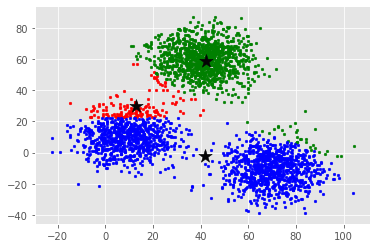

In [8]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
fig, ax = plt.subplots()

for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
ax.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')

# The scikit-learn approach

In [14]:
from sklearn.cluster import KMeans

# Number of clusters
kmeans = KMeans(n_clusters=3)
# Fitting the input data
kmeans = kmeans.fit(X)
# Getting the cluster labels
labels = kmeans.predict(X)
# Centroid values
centroids = kmeans.cluster_centers_

In [15]:
# Comparing with scikit-learn centroids
print(C) # From Scratch
print(centroids) # From sci-kit learn

[[12.783464  29.78456  ]
 [42.21874   58.651825 ]
 [41.89265   -2.0799568]]
[[  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]]


# Elbow method

We use a method called ELBOW method to find the appropriate number of clusters. The parameter which will be taken into consideration is Sum of squares of distances of every data point from its corresponding cluster centroid which is called WCSS ( Within-Cluster Sums of Squares).

**Steps involved in ELBOW method are:**
1. Perform K means clustering on different values of K ranging from 1 to any upper limit. Here we are taking the upper limit as 10.
2. For each K, calculate WCSS
3. Plot the value for WCSS with the number of clusters K.


In [16]:
from scipy.spatial.distance import cdist

# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])


# $\Omega$ Practice: Plot the elbow line

Can you plot the elbow line with x-axis: number of cluster and y-axis: distortions (Within-cluster variation)

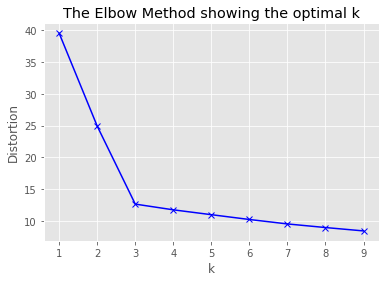

In [13]:
######### insert your code here ############
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()